In [1]:
import os
import sys
import pandas as pd
sys.path.append(os.path.abspath('../Scripts'))
import warnings
warnings.filterwarnings('ignore')

In [2]:
import eda as ed

In [3]:
import feature as ft

In [4]:
df = 'data.csv'
data = ed.load_data(df)

2024-10-11 07:12:45,790 - INFO - Attempting to load data from data.csv
2024-10-11 07:12:45,790 - INFO - Attempting to load data from data.csv
2024-10-11 07:12:46,640 - INFO - Successfully loaded data from data.csv
2024-10-11 07:12:46,640 - INFO - Successfully loaded data from data.csv


In [5]:
data['TransactionStartTime'] = pd.to_datetime(data['TransactionStartTime'])


In [6]:
current_date = pd.to_datetime('now')

In [7]:
print(data['TransactionStartTime'].dtype)

datetime64[ns, UTC]


In [8]:
#data['TransactionStartTime'] = data['TransactionStartTime'].dt.tz_convert(None)

In [9]:
features = ft.extract_features(data)

2024-10-11 07:12:47,807 - INFO - extracting feaure for credit risk model...
2024-10-11 07:12:47,807 - INFO - extracting feaure for credit risk model...


In [10]:
features.describe(include= 'object')

,CustomerId
count,3742
unique,3742
top,CustomerId_1
freq,1


In [11]:
features.dtypes

CustomerId                         object
Transaction_Frequency               int64
Avg_Transaction_Amount            float64
Total_Transaction_Volume          float64
Transaction_Recency                 int64
Transaction_Amount_Variability    float64
Avg_Transaction_Hour              float64
Avg_Transaction_Day               float64
Avg_Transaction_Month             float64
Avg_Transaction_Year              float64
dtype: object

## Encoding catagorical varibles

In [12]:
ft.LabelEncoder(features)

2024-10-11 07:12:48,889 - INFO - encoding catagorical variables...
2024-10-11 07:12:48,889 - INFO - encoding catagorical variables...


<function feature.LabelEncoder(features)>

In [13]:
ft.check_missing_value(features)

2024-10-11 07:12:49,143 - INFO - checking the missin value...
2024-10-11 07:12:49,143 - INFO - checking the missin value...
CustomerId                          0
Transaction_Frequency               0
Avg_Transaction_Amount              0
Total_Transaction_Volume            0
Transaction_Recency                 0
Transaction_Amount_Variability    712
Avg_Transaction_Hour                0
Avg_Transaction_Day                 0
Avg_Transaction_Month               0
Avg_Transaction_Year                0
dtype: int64
2024-10-11 07:12:49,155 - INFO - Missing value checked
2024-10-11 07:12:49,155 - INFO - Missing value checked


In [14]:
# Replace 'your_column_name' with the name of the column you want to fill
features['Transaction_Amount_Variability'].fillna(0, inplace=True)
# Check if the missing values are filled
print(features['Transaction_Amount_Variability'].isnull().sum())


0


### check for missing values

there is no missing value from the featured dataframe

### Normalize the numerical values

In [15]:
ft.scaling(features)

2024-10-11 07:12:49,444 - INFO - scaling numerical columns...
2024-10-11 07:12:49,444 - INFO - scaling numerical columns...
2024-10-11 07:12:49,460 - INFO - Numerical columns Scaled.
2024-10-11 07:12:49,460 - INFO - Numerical columns Scaled.


In [16]:
features

,CustomerId,Transaction_Frequency,Avg_Transaction_Amount,Total_Transaction_Volume,Transaction_Recency,Transaction_Amount_Variability,Avg_Transaction_Hour,Avg_Transaction_Day,Avg_Transaction_Month,Avg_Transaction_Year
0,CustomerId_1,0.000000,0.045974,0.556885,0.923077,0.005076,0.695652,0.666667,0.909091,0.000000
1,CustomerId_10,0.000000,0.045974,0.556885,0.923077,0.005076,0.695652,0.666667,0.909091,0.000000
2,CustomerId_1001,0.000978,0.047525,0.557044,0.978022,0.001982,0.339130,0.500000,0.909091,0.000000
3,CustomerId_1002,0.002445,0.047124,0.556961,0.285714,0.000169,0.584980,0.457576,0.694215,0.272727
4,CustomerId_1003,0.001222,0.047451,0.557044,0.131868,0.001822,0.623188,0.000000,0.090909,1.000000
...,...,...,...,...,...,...,...,...,...,...
3737,CustomerId_992,0.001222,0.047451,0.557044,0.054945,0.001839,0.434783,0.233333,0.090909,1.000000
3738,CustomerId_993,0.000978,0.047525,0.557044,0.285714,0.002038,0.652174,0.566667,0.000000,1.000000
3739,CustomerId_994,0.024450,0.047678,0.559826,0.010989,0.004472,0.604391,0.582508,0.382538,0.623762
3740,CustomerId_996,0.003912,0.047988,0.557676,0.747253,0.001339,0.629156,0.200000,1.000000,0.000000


In [17]:
features.to_csv('features.csv', index=False)

# WOE

In [18]:
features

,CustomerId,Transaction_Frequency,Avg_Transaction_Amount,Total_Transaction_Volume,Transaction_Recency,Transaction_Amount_Variability,Avg_Transaction_Hour,Avg_Transaction_Day,Avg_Transaction_Month,Avg_Transaction_Year
0,CustomerId_1,0.000000,0.045974,0.556885,0.923077,0.005076,0.695652,0.666667,0.909091,0.000000
1,CustomerId_10,0.000000,0.045974,0.556885,0.923077,0.005076,0.695652,0.666667,0.909091,0.000000
2,CustomerId_1001,0.000978,0.047525,0.557044,0.978022,0.001982,0.339130,0.500000,0.909091,0.000000
3,CustomerId_1002,0.002445,0.047124,0.556961,0.285714,0.000169,0.584980,0.457576,0.694215,0.272727
4,CustomerId_1003,0.001222,0.047451,0.557044,0.131868,0.001822,0.623188,0.000000,0.090909,1.000000
...,...,...,...,...,...,...,...,...,...,...
3737,CustomerId_992,0.001222,0.047451,0.557044,0.054945,0.001839,0.434783,0.233333,0.090909,1.000000
3738,CustomerId_993,0.000978,0.047525,0.557044,0.285714,0.002038,0.652174,0.566667,0.000000,1.000000
3739,CustomerId_994,0.024450,0.047678,0.559826,0.010989,0.004472,0.604391,0.582508,0.382538,0.623762
3740,CustomerId_996,0.003912,0.047988,0.557676,0.747253,0.001339,0.629156,0.200000,1.000000,0.000000


In [19]:
ft.classify_rfms(features)

2024-10-11 07:12:50,106 - INFO - classifying rfs features....
2024-10-11 07:12:50,106 - INFO - classifying rfs features....
2024-10-11 07:12:50,112 - INFO - classifying rfs features....
2024-10-11 07:12:50,112 - INFO - classifying rfs features....
2024-10-11 07:12:50,118 - INFO - classifying rfs features....
2024-10-11 07:12:50,118 - INFO - classifying rfs features....
2024-10-11 07:12:50,125 - INFO - classifying rfs features....
2024-10-11 07:12:50,125 - INFO - classifying rfs features....
2024-10-11 07:12:50,136 - INFO - classifying rfs features....
2024-10-11 07:12:50,136 - INFO - classifying rfs features....
2024-10-11 07:12:50,144 - INFO - classifying rfs features....
2024-10-11 07:12:50,144 - INFO - classifying rfs features....
2024-10-11 07:12:50,154 - INFO - classifying rfs features....
2024-10-11 07:12:50,154 - INFO - classifying rfs features....
2024-10-11 07:12:50,161 - INFO - classifying rfs features....
2024-10-11 07:12:50,161 - INFO - classifying rfs features....
2024-10-

RecursionError: maximum recursion depth exceeded

In [20]:


# Step 2: Classify RFMS Features
def classify_rfms(features):
    # Define weights for RFMS components
    w_recency = 0.25
    w_frequency = 0.25
    w_volume = 0.25

    # Calculate RFMS Score
    features['RFMS_Score'] = (features['Transaction_Recency'] * w_recency) + \
                              (features['Transaction_Frequency'] * w_frequency) + \
                              (features['Total_Transaction_Volume'] * w_volume)

    # Define good/bad classification based on threshold
    threshold = features['RFMS_Score'].median()  # This can be adjusted
    features['Risk_Label'] = np.where(features['RFMS_Score'] > threshold, 'Good', 'Bad')

    return features

# Classify RFMS features
classified_features = classify_rfms(features)
print(classified_features.head())


NameError: name 'np' is not defined

In [101]:
features

,CustomerId,Transaction_Frequency,Avg_Transaction_Amount,Total_Transaction_Volume,Transaction_Recency,Transaction_Amount_Variability,Avg_Transaction_Hour,Avg_Transaction_Day,Avg_Transaction_Month,Avg_Transaction_Year,RFMS_Score,Risk_Label
0,CustomerId_1,0.000000,0.045974,0.556885,0.923077,0.005076,0.695652,0.666667,0.909091,0.000000,0.369991,Good
1,CustomerId_10,0.000000,0.045974,0.556885,0.923077,0.005076,0.695652,0.666667,0.909091,0.000000,0.369991,Good
2,CustomerId_1001,0.000978,0.047525,0.557044,0.978022,0.001982,0.339130,0.500000,0.909091,0.000000,0.384011,Good
3,CustomerId_1002,0.002445,0.047124,0.556961,0.285714,0.000169,0.584980,0.457576,0.694215,0.272727,0.211280,Good
4,CustomerId_1003,0.001222,0.047451,0.557044,0.131868,0.001822,0.623188,0.000000,0.090909,1.000000,0.172534,Bad
...,...,...,...,...,...,...,...,...,...,...,...,...
3737,CustomerId_992,0.001222,0.047451,0.557044,0.054945,0.001839,0.434783,0.233333,0.090909,1.000000,0.153303,Bad
3738,CustomerId_993,0.000978,0.047525,0.557044,0.285714,0.002038,0.652174,0.566667,0.000000,1.000000,0.210934,Good
3739,CustomerId_994,0.024450,0.047678,0.559826,0.010989,0.004472,0.604391,0.582508,0.382538,0.623762,0.148816,Bad
3740,CustomerId_996,0.003912,0.047988,0.557676,0.747253,0.001339,0.629156,0.200000,1.000000,0.000000,0.327210,Good


In [ ]:
ft.perform_woe_binning(features)

In [103]:
import pandas as pd

# Assuming the 'classified_features' DataFrame contains your classified data

def perform_woe_binning(features):
    # Define bins for features
    # Example binning logic, adjust as needed
    features['Recency_Bin'] = pd.qcut(features['Transaction_Recency'], q=4, labels=['Very Recent', 'Recent', 'Old', 'Very Old'])
    features['Frequency_Bin'] = pd.qcut(features['Transaction_Frequency'], q=4, labels=['Very Low', 'Low', 'High', 'Very High'])
    features['Volume_Bin'] = pd.qcut(features['Total_Transaction_Volume'], q=4, labels=['Very Low', 'Low', 'High', 'Very High'])

    # Calculate WoE
    woe_df = features.groupby(['Risk_Label', 'Recency_Bin']).size().unstack().fillna(0)
    woe_df = (woe_df / woe_df.sum(axis=0)).T  # Normalize by the total

    features['Recency_WoE'] = features['Recency_Bin'].map(woe_df.to_dict().get('Good'))
    
    return features

# Perform WoE Binning
woe_features = perform_woe_binning(classified_features)
print(woe_features[['Transaction_Recency', 'Recency_Bin', 'Recency_WoE']].head())


   Transaction_Recency Recency_Bin  Recency_WoE
0             0.923077    Very Old     1.000000
1             0.923077    Very Old     1.000000
2             0.978022    Very Old     1.000000
3             0.285714         Old     1.000000
4             0.131868      Recent     0.029476


In [ ]:
ft.visualize_rfms(features)

2024-10-11 06:46:49,875 - DEBUG - Loaded backend module://matplotlib_inline.backend_inline version unknown.
2024-10-11 06:46:49,875 - DEBUG - Loaded backend module://matplotlib_inline.backend_inline version unknown.
2024-10-11 06:46:49,890 - DEBUG - Loaded backend module://matplotlib_inline.backend_inline version unknown.
2024-10-11 06:46:49,890 - DEBUG - Loaded backend module://matplotlib_inline.backend_inline version unknown.
2024-10-11 06:46:49,915 - DEBUG - findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
2024-10-11 06:46:49,915 - DEBUG - findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
2024-10-11 06:46:49,920 - DEBUG - findfont: score(FontEntry(fname='c:\\Users\\BEZA\\Desktop\\Weekk6\\Credit-risk-Modelling\\venv\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSerifDisplay.ttf', name='DejaVu Serif Display', style='normal', variant='normal', weight=400, stretch='normal', 

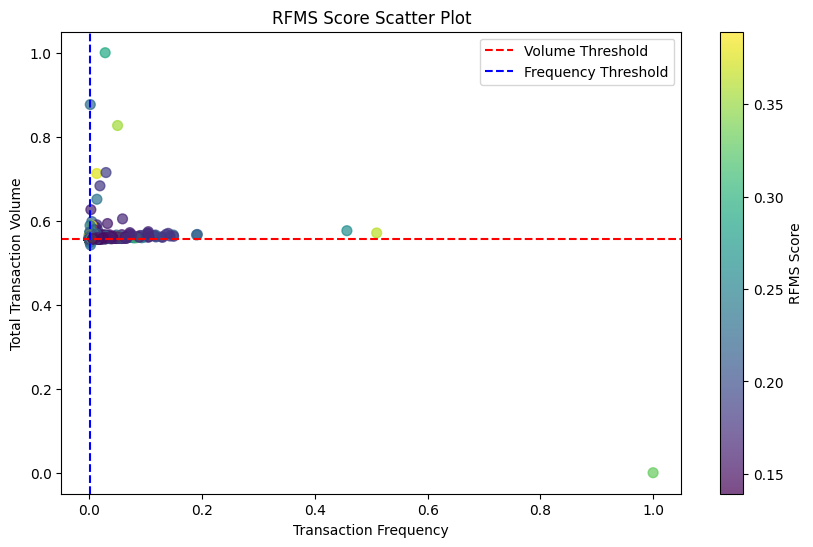

In [104]:
import matplotlib.pyplot as plt

def visualize_rfms(features):
    plt.figure(figsize=(10, 6))
    plt.scatter(features['Transaction_Frequency'], features['Total_Transaction_Volume'], 
                c=features['RFMS_Score'], cmap='viridis', s=50, alpha=0.7)
    plt.colorbar(label='RFMS Score')
    plt.xlabel('Transaction Frequency')
    plt.ylabel('Total Transaction Volume')
    plt.title('RFMS Score Scatter Plot')
    plt.axhline(y=features['Total_Transaction_Volume'].median(), color='r', linestyle='--', label='Volume Threshold')
    plt.axvline(x=features['Transaction_Frequency'].median(), color='b', linestyle='--', label='Frequency Threshold')
    plt.legend()
    plt.show()

# Visualize RFMS
visualize_rfms(woe_features)
